In [1]:
import numpy as np
import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

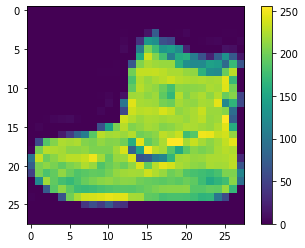

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

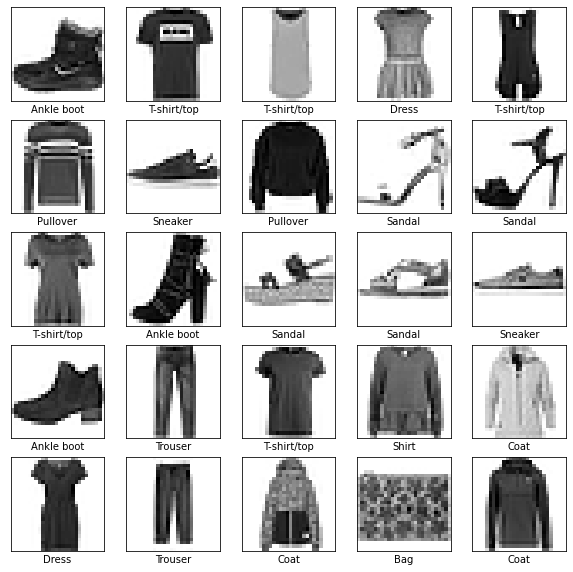

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, input_dim=600, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                          
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


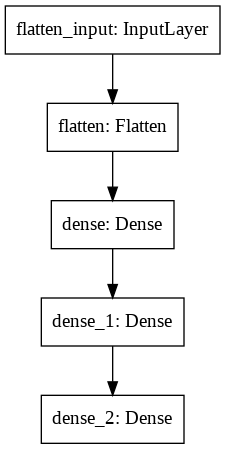

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4939 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3656 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3064 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2654 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2541 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2451 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 0s - loss: 0.3517 - accuracy: 0.8789

Точность на проверочных данных: 0.8788999915122986


In [14]:
# Точность на проверочных данных хуже, чем на тренировочных.

In [15]:
# Сделаем предсказание
predictions = model.predict(test_images)

In [16]:
# Посмотрим на первое предсказание
predictions[0]

array([5.3956853e-08, 1.8815514e-06, 2.3138810e-07, 1.0427470e-07,
       3.2419763e-08, 4.4811654e-04, 2.1641338e-07, 1.8634163e-02,
       1.0145225e-06, 9.8091412e-01], dtype=float32)

In [19]:
# Посмотрим какой метке соответствует максимальное значение
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [24]:
# Функция для показа картинки
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
# Функция для показа результатов предсказания
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

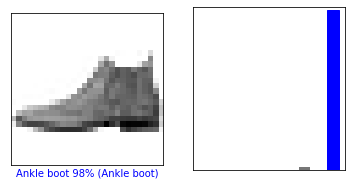

In [25]:
# Предсказание сделано верно. Можно на него посмотреть
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

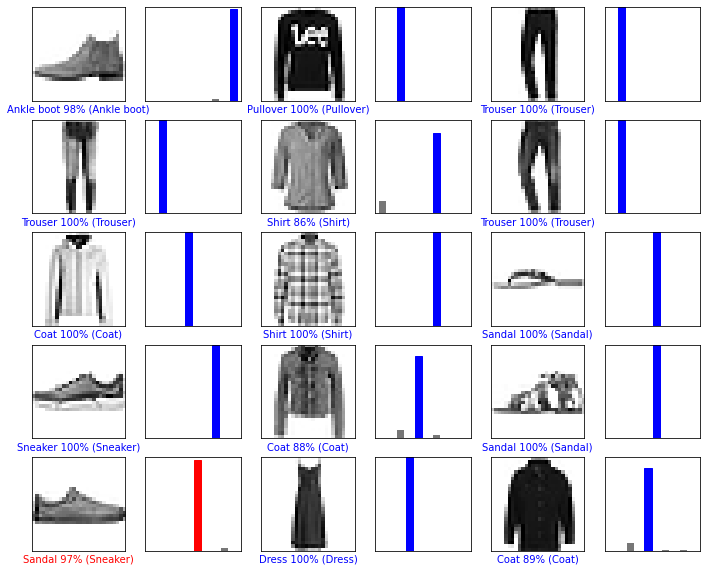

In [26]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Один башмак нейросеть не узнала.